In [1]:
import numpy as np
import pandas as pd

In [2]:
# Load the match and delivery data from CSV files
match = pd.read_csv('ODI_Match_Info.csv')
delivery = pd.read_csv('ODI_Match_Data.csv', low_memory=False)
# Check the contents and dimensions of the match and delivery data
match.iloc[0,:]

id                                        1389389
season                                    2023/24
city                                       Indore
date                                   2023/09/24
team1                                       India
team2                                   Australia
toss_winner                             Australia
toss_decision                               field
result                                        D/L
dl_applied                                      1
winner                                      India
win_by_runs                                    99
win_by_wickets                                  0
player_of_match                           SS Iyer
venue              Holkar Cricket Stadium, Indore
umpire1                             J Madanagopal
umpire2                           HDPK Dharmasena
umpire3                     KN Ananthapadmanabhan
Name: 0, dtype: object

In [46]:
delivery

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,cricsheet_id
0,1389389,2023/24,2023-09-24,"Holkar Cricket Stadium, Indore",1,0.1,India,Australia,RD Gaikwad,Shubman Gill,SH Johnson,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1389389
1,1389389,2023/24,2023-09-24,"Holkar Cricket Stadium, Indore",1,0.2,India,Australia,RD Gaikwad,Shubman Gill,SH Johnson,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1389389
2,1389389,2023/24,2023-09-24,"Holkar Cricket Stadium, Indore",1,0.3,India,Australia,RD Gaikwad,Shubman Gill,SH Johnson,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1389389
3,1389389,2023/24,2023-09-24,"Holkar Cricket Stadium, Indore",1,0.4,India,Australia,RD Gaikwad,Shubman Gill,SH Johnson,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1389389
4,1389389,2023/24,2023-09-24,"Holkar Cricket Stadium, Indore",1,0.5,India,Australia,RD Gaikwad,Shubman Gill,SH Johnson,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1389389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1265098,64814,2002/03,2002-12-29,"McLean Park, Napier",2,42.6,India,New Zealand,J Srinath,Z Khan,PA Hitchcock,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64814
1265099,64814,2002/03,2002-12-29,"McLean Park, Napier",2,43.1,India,New Zealand,Z Khan,J Srinath,KD Mills,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64814
1265100,64814,2002/03,2002-12-29,"McLean Park, Napier",2,43.2,India,New Zealand,J Srinath,Z Khan,KD Mills,0,0,NaN,NaN,NaN,NaN,NaN,caught,J Srinath,NaN,NaN,64814
1265101,64814,2002/03,2002-12-29,"McLean Park, Napier",2,43.3,India,New Zealand,Z Khan,A Nehra,KD Mills,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64814


In [47]:
match.shape

(2379, 18)

In [48]:
delivery.shape

(1265103, 23)

In [49]:
# Print the columns of the delivery DataFrame to inspect available data
print(delivery.columns)

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed', 'cricsheet_id'],
      dtype='object')


In [50]:
# Calculate total runs for each delivery by summing runs_off_bat and extras (handling NaN values)
delivery['total_runs'] = delivery['runs_off_bat'] + delivery['extras'].fillna(0)

In [51]:
# Group by match_id and innings to calculate the sum of total_runs for each innings
finalscoredf = delivery.groupby(['match_id', 'innings']).sum()['total_runs'].reset_index()

In [52]:
finalscoredf

,match_id,innings,total_runs
0,64814,1,254
1,64814,2,219
2,64815,1,108
3,64815,2,109
4,64816,1,122
...,...,...,...
4696,1390346,1,268
4697,1390346,2,209
4698,1395700,1,136
4699,1395701,1,254


In [53]:
# Filter to only include innings 1 scores (first batting innings)
finalscoredf = finalscoredf[finalscoredf['innings'] == 1]

In [54]:
# Merge final score data (total_runs) with match information, joining on match_id
matchdf = match.merge(finalscoredf[['match_id', 'total_runs']], left_on='id', right_on='match_id')

In [55]:
# Filter to only include relevant teams
teams = [
    'Australia',
    'India',
    'Bangladesh',
    'New Zealand',
    'South Africa',
    'England',
    'West Indies',
    'Afghanistan',
    'Pakistan',
    'Sri Lanka'    
]

In [56]:
# Filter matchdf to only include matches with the selected teams and where DL method was not applied
matchdf = matchdf[matchdf['team1'].isin(teams)]
matchdf = matchdf[matchdf['team2'].isin(teams)]
matchdf = matchdf[matchdf['dl_applied'] == 0]

In [57]:
# Keep only relevant columns for further analysis
matchdf = matchdf[['match_id','city','winner','total_runs']]

In [58]:
# Merge the match data with the delivery data on match_id and filter for second innings
deliverydf = matchdf.merge(delivery,on='match_id')

In [59]:
deliverydf = deliverydf[deliverydf['innings'] == 2]

In [60]:
# Ensure the city and winner columns don't contain missing values
pd.set_option('display.max_columns', None)
deliverydf=deliverydf.dropna(subset=['city','winner'])

In [61]:
# Check the data type of 'total_runs_y' for consistency
print(deliverydf['total_runs_y'].dtype)

# Calculate the cumulative score for each match, storing it in 'currentscore'
deliverydf['currentscore'] = deliverydf.groupby('match_id')['total_runs_y'].cumsum()

int64


In [62]:
# Calculate runs left to win by subtracting the current score from the target score
deliverydf['runs_left'] = deliverydf['total_runs_x'] - deliverydf['currentscore'] + 1
deliverydf

,match_id,city,winner,total_runs_x,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,cricsheet_id,total_runs_y,currentscore,runs_left
303,1395701,Dhaka,New Zealand,254,2023,2023-09-23,"Shere Bangla National Stadium, Mirpur",2,0.1,Bangladesh,New Zealand,Tamim Iqbal,Liton Das,TA Boult,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1395701,0,0,255
304,1395701,Dhaka,New Zealand,254,2023,2023-09-23,"Shere Bangla National Stadium, Mirpur",2,0.2,Bangladesh,New Zealand,Tamim Iqbal,Liton Das,TA Boult,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1395701,0,0,255
305,1395701,Dhaka,New Zealand,254,2023,2023-09-23,"Shere Bangla National Stadium, Mirpur",2,0.3,Bangladesh,New Zealand,Tamim Iqbal,Liton Das,TA Boult,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1395701,0,0,255
306,1395701,Dhaka,New Zealand,254,2023,2023-09-23,"Shere Bangla National Stadium, Mirpur",2,0.4,Bangladesh,New Zealand,Tamim Iqbal,Liton Das,TA Boult,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1395701,1,1,254
307,1395701,Dhaka,New Zealand,254,2023,2023-09-23,"Shere Bangla National Stadium, Mirpur",2,0.5,Bangladesh,New Zealand,Liton Das,Tamim Iqbal,TA Boult,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1395701,0,1,254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789641,64814,Napier,New Zealand,254,2002/03,2002-12-29,"McLean Park, Napier",2,42.6,India,New Zealand,J Srinath,Z Khan,PA Hitchcock,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64814,0,216,39
789642,64814,Napier,New Zealand,254,2002/03,2002-12-29,"McLean Park, Napier",2,43.1,India,New Zealand,Z Khan,J Srinath,KD Mills,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64814,1,217,38
789643,64814,Napier,New Zealand,254,2002/03,2002-12-29,"McLean Park, Napier",2,43.2,India,New Zealand,J Srinath,Z Khan,KD Mills,0,0,NaN,NaN,NaN,NaN,NaN,caught,J Srinath,NaN,NaN,64814,0,217,38
789644,64814,Napier,New Zealand,254,2002/03,2002-12-29,"McLean Park, Napier",2,43.3,India,New Zealand,Z Khan,A Nehra,KD Mills,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64814,2,219,36


In [63]:
# Split 'ball' column into 'over' and 'ballofover' for better understanding of match progress
deliverydf['over'] = deliverydf['ball'].apply(lambda x:str(x).split(".")[0])
deliverydf['ballofover'] = deliverydf['ball'].apply(lambda x:str(x).split(".")[1])
deliverydf

,match_id,city,winner,total_runs_x,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,cricsheet_id,total_runs_y,currentscore,runs_left,over,ballofover
303,1395701,Dhaka,New Zealand,254,2023,2023-09-23,"Shere Bangla National Stadium, Mirpur",2,0.1,Bangladesh,New Zealand,Tamim Iqbal,Liton Das,TA Boult,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1395701,0,0,255,0,1
304,1395701,Dhaka,New Zealand,254,2023,2023-09-23,"Shere Bangla National Stadium, Mirpur",2,0.2,Bangladesh,New Zealand,Tamim Iqbal,Liton Das,TA Boult,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1395701,0,0,255,0,2
305,1395701,Dhaka,New Zealand,254,2023,2023-09-23,"Shere Bangla National Stadium, Mirpur",2,0.3,Bangladesh,New Zealand,Tamim Iqbal,Liton Das,TA Boult,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1395701,0,0,255,0,3
306,1395701,Dhaka,New Zealand,254,2023,2023-09-23,"Shere Bangla National Stadium, Mirpur",2,0.4,Bangladesh,New Zealand,Tamim Iqbal,Liton Das,TA Boult,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1395701,1,1,254,0,4
307,1395701,Dhaka,New Zealand,254,2023,2023-09-23,"Shere Bangla National Stadium, Mirpur",2,0.5,Bangladesh,New Zealand,Liton Das,Tamim Iqbal,TA Boult,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1395701,0,1,254,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789641,64814,Napier,New Zealand,254,2002/03,2002-12-29,"McLean Park, Napier",2,42.6,India,New Zealand,J Srinath,Z Khan,PA Hitchcock,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64814,0,216,39,42,6
789642,64814,Napier,New Zealand,254,2002/03,2002-12-29,"McLean Park, Napier",2,43.1,India,New Zealand,Z Khan,J Srinath,KD Mills,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64814,1,217,38,43,1
789643,64814,Napier,New Zealand,254,2002/03,2002-12-29,"McLean Park, Napier",2,43.2,India,New Zealand,J Srinath,Z Khan,KD Mills,0,0,NaN,NaN,NaN,NaN,NaN,caught,J Srinath,NaN,NaN,64814,0,217,38,43,2
789644,64814,Napier,New Zealand,254,2002/03,2002-12-29,"McLean Park, Napier",2,43.3,India,New Zealand,Z Khan,A Nehra,KD Mills,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64814,2,219,36,43,3


In [64]:
# Convert 'over' and 'ballofover' to numeric types
deliverydf['over'] = pd.to_numeric(deliverydf['over'], errors='coerce')
deliverydf['ballofover'] = pd.to_numeric(deliverydf['ballofover'], errors='coerce')
# Calculate the total balls left by subtracting the number of balls bowled from 300 (50 overs * 6 balls)
deliverydf['balls_left'] = 300 - (deliverydf['over'] * 6 + deliverydf['ballofover'])

deliverydf

,match_id,city,winner,total_runs_x,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,cricsheet_id,total_runs_y,currentscore,runs_left,over,ballofover,balls_left
303,1395701,Dhaka,New Zealand,254,2023,2023-09-23,"Shere Bangla National Stadium, Mirpur",2,0.1,Bangladesh,New Zealand,Tamim Iqbal,Liton Das,TA Boult,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1395701,0,0,255,0,1,299
304,1395701,Dhaka,New Zealand,254,2023,2023-09-23,"Shere Bangla National Stadium, Mirpur",2,0.2,Bangladesh,New Zealand,Tamim Iqbal,Liton Das,TA Boult,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1395701,0,0,255,0,2,298
305,1395701,Dhaka,New Zealand,254,2023,2023-09-23,"Shere Bangla National Stadium, Mirpur",2,0.3,Bangladesh,New Zealand,Tamim Iqbal,Liton Das,TA Boult,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1395701,0,0,255,0,3,297
306,1395701,Dhaka,New Zealand,254,2023,2023-09-23,"Shere Bangla National Stadium, Mirpur",2,0.4,Bangladesh,New Zealand,Tamim Iqbal,Liton Das,TA Boult,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1395701,1,1,254,0,4,296
307,1395701,Dhaka,New Zealand,254,2023,2023-09-23,"Shere Bangla National Stadium, Mirpur",2,0.5,Bangladesh,New Zealand,Liton Das,Tamim Iqbal,TA Boult,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1395701,0,1,254,0,5,295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789641,64814,Napier,New Zealand,254,2002/03,2002-12-29,"McLean Park, Napier",2,42.6,India,New Zealand,J Srinath,Z Khan,PA Hitchcock,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64814,0,216,39,42,6,42
789642,64814,Napier,New Zealand,254,2002/03,2002-12-29,"McLean Park, Napier",2,43.1,India,New Zealand,Z Khan,J Srinath,KD Mills,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64814,1,217,38,43,1,41
789643,64814,Napier,New Zealand,254,2002/03,2002-12-29,"McLean Park, Napier",2,43.2,India,New Zealand,J Srinath,Z Khan,KD Mills,0,0,NaN,NaN,NaN,NaN,NaN,caught,J Srinath,NaN,NaN,64814,0,217,38,43,2,40
789644,64814,Napier,New Zealand,254,2002/03,2002-12-29,"McLean Park, Napier",2,43.3,India,New Zealand,Z Khan,A Nehra,KD Mills,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64814,2,219,36,43,3,39


In [65]:
# Handle player dismissals by replacing NaN values in 'player_dismissed' with 0, and convert to int for calculations
deliverydf['player_dismissed'] = deliverydf['player_dismissed'].fillna("0")

In [66]:
#Replace player_dissmised with 1 onwhich ball player is dismmised.
deliverydf['player_dismissed'] = deliverydf['player_dismissed'].apply(lambda x:x if x == "0" else "1")


In [67]:
deliverydf['player_dismissed'] = deliverydf['player_dismissed'].astype('int')
deliverydf

,match_id,city,winner,total_runs_x,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,cricsheet_id,total_runs_y,currentscore,runs_left,over,ballofover,balls_left
303,1395701,Dhaka,New Zealand,254,2023,2023-09-23,"Shere Bangla National Stadium, Mirpur",2,0.1,Bangladesh,New Zealand,Tamim Iqbal,Liton Das,TA Boult,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,1395701,0,0,255,0,1,299
304,1395701,Dhaka,New Zealand,254,2023,2023-09-23,"Shere Bangla National Stadium, Mirpur",2,0.2,Bangladesh,New Zealand,Tamim Iqbal,Liton Das,TA Boult,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,1395701,0,0,255,0,2,298
305,1395701,Dhaka,New Zealand,254,2023,2023-09-23,"Shere Bangla National Stadium, Mirpur",2,0.3,Bangladesh,New Zealand,Tamim Iqbal,Liton Das,TA Boult,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,1395701,0,0,255,0,3,297
306,1395701,Dhaka,New Zealand,254,2023,2023-09-23,"Shere Bangla National Stadium, Mirpur",2,0.4,Bangladesh,New Zealand,Tamim Iqbal,Liton Das,TA Boult,1,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,1395701,1,1,254,0,4,296
307,1395701,Dhaka,New Zealand,254,2023,2023-09-23,"Shere Bangla National Stadium, Mirpur",2,0.5,Bangladesh,New Zealand,Liton Das,Tamim Iqbal,TA Boult,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,1395701,0,1,254,0,5,295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789641,64814,Napier,New Zealand,254,2002/03,2002-12-29,"McLean Park, Napier",2,42.6,India,New Zealand,J Srinath,Z Khan,PA Hitchcock,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,64814,0,216,39,42,6,42
789642,64814,Napier,New Zealand,254,2002/03,2002-12-29,"McLean Park, Napier",2,43.1,India,New Zealand,Z Khan,J Srinath,KD Mills,1,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,64814,1,217,38,43,1,41
789643,64814,Napier,New Zealand,254,2002/03,2002-12-29,"McLean Park, Napier",2,43.2,India,New Zealand,J Srinath,Z Khan,KD Mills,0,0,NaN,NaN,NaN,NaN,NaN,caught,1,NaN,NaN,64814,0,217,38,43,2,40
789644,64814,Napier,New Zealand,254,2002/03,2002-12-29,"McLean Park, Napier",2,43.3,India,New Zealand,Z Khan,A Nehra,KD Mills,2,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,64814,2,219,36,43,3,39


In [68]:
# Calculate total wickets lost during the second innings of the match
wickets = deliverydf.groupby('match_id')['player_dismissed'].cumsum()
deliverydf['wickets_left'] = 10 - wickets
deliverydf.tail(6)

,match_id,city,winner,total_runs_x,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,cricsheet_id,total_runs_y,currentscore,runs_left,over,ballofover,balls_left,wickets_left
789640,64814,Napier,New Zealand,254,2002/03,2002-12-29,"McLean Park, Napier",2,42.5,India,New Zealand,J Srinath,Z Khan,PA Hitchcock,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,64814,0,216,39,42,5,43,2
789641,64814,Napier,New Zealand,254,2002/03,2002-12-29,"McLean Park, Napier",2,42.6,India,New Zealand,J Srinath,Z Khan,PA Hitchcock,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,64814,0,216,39,42,6,42,2
789642,64814,Napier,New Zealand,254,2002/03,2002-12-29,"McLean Park, Napier",2,43.1,India,New Zealand,Z Khan,J Srinath,KD Mills,1,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,64814,1,217,38,43,1,41,2
789643,64814,Napier,New Zealand,254,2002/03,2002-12-29,"McLean Park, Napier",2,43.2,India,New Zealand,J Srinath,Z Khan,KD Mills,0,0,NaN,NaN,NaN,NaN,NaN,caught,1,NaN,NaN,64814,0,217,38,43,2,40,1
789644,64814,Napier,New Zealand,254,2002/03,2002-12-29,"McLean Park, Napier",2,43.3,India,New Zealand,Z Khan,A Nehra,KD Mills,2,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,64814,2,219,36,43,3,39,1
789645,64814,Napier,New Zealand,254,2002/03,2002-12-29,"McLean Park, Napier",2,43.4,India,New Zealand,Z Khan,A Nehra,KD Mills,0,0,NaN,NaN,NaN,NaN,NaN,caught,1,NaN,NaN,64814,0,219,36,43,4,38,0


In [69]:
# Calculate current run rate (CRR) using the formula: (current score * 6) / balls faced
deliverydf['crr'] = (deliverydf['currentscore']*6)/(300 - deliverydf['balls_left'])

In [70]:
# Calculate required run rate (RRR) using the formula: (runs left * 6) / balls remaining
deliverydf['rrr'] = (deliverydf['runs_left']*6)/deliverydf['balls_left']

In [71]:
# Create a new column 'result' to display  whether the chasing team won (1) or lost (0)
# This is determined by comparing the batting team with the match winner
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

deliverydf['result'] = deliverydf.apply(result,axis=1)

In [72]:
# Create a final dataframe with relevant columns for training the model
finaldf = deliverydf[['batting_team','bowling_team','city','runs_left','balls_left','wickets_left','total_runs_x','crr','rrr','result']]

In [73]:
# Randomly shuffle the rows in finaldf
finaldf = finaldf.sample(finaldf.shape[0])

finaldf

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,crr,rrr,result
131620,South Africa,Pakistan,Cape Town,22,77,7,240,5.892377,1.714286,1
366161,South Africa,India,Cardiff,224,216,8,331,7.714286,6.222222,0
170819,Sri Lanka,Bangladesh,Dhaka,233,180,6,320,4.400000,7.766667,0
542666,Australia,South Africa,Port Elizabeth,285,267,10,317,6.000000,6.404494,0
29025,New Zealand,Pakistan,Karachi,100,86,5,280,5.074766,6.976744,1
...,...,...,...,...,...,...,...,...,...,...
99626,New Zealand,Australia,London,124,100,5,243,3.600000,7.440000,0
492096,West Indies,South Africa,Dominica,121,138,5,224,3.851852,5.260870,0
783878,Australia,England,Adelaide,128,217,8,152,1.807229,3.539171,1
49114,Pakistan,Australia,Lahore,158,245,9,210,5.781818,3.869388,1


In [74]:
# Drop rows with missing values, and ensure no rows with 0 balls left are included
finaldf.dropna(inplace=True)
finaldf=finaldf[finaldf['balls_left']!=0]
finaldf.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,crr,rrr,result
259115,Australia,England,Manchester,237,227,9,300,5.260274,6.264317,0


In [75]:
finaldf.columns

Index(['batting_team', 'bowling_team', 'city', 'runs_left', 'balls_left',
       'wickets_left', 'total_runs_x', 'crr', 'rrr', 'result'],
      dtype='object')

In [76]:
# Save the final data to a CSV file for future use
finaldf.to_csv('Win_Predictor_Data.csv')

In [77]:
# Define features (X) and target (y) for model training
X = finaldf.iloc[:, :-1]  # All columns except 'result' are features
y = finaldf.iloc[:, -1]   # 'result' is the target variable

# Split the data into training and testing sets (80% train, 20% test)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [78]:
# Display a description of the training data
X_train.describe

<bound method NDFrame.describe of        batting_team bowling_team        city  runs_left  balls_left  \
620888    Australia    Sri Lanka     Grenada        179         246   
197056      England   Bangladesh      London        112         101   
467120        India  New Zealand    Vadodara        208         281   
187760        India  West Indies     Jamaica         66         140   
200356     Pakistan  West Indies      Guyana        126         163   
...             ...          ...         ...        ...         ...   
276154        India  West Indies       Perth        150         244   
101204     Pakistan  New Zealand  Birmingham        127         148   
39633     Australia  New Zealand      Cairns        181         215   
437786      England    Sri Lanka       Leeds        261         246   
567897  West Indies    Australia    St Kitts        212         215   

        wickets_left  total_runs_x       crr       rrr  
620888            10           226  5.333333  4.365854  

In [79]:
y_train.describe

<bound method NDFrame.describe of 620888    1
197056    1
467120    1
187760    1
200356    1
         ..
276154    1
101204    1
39633     1
437786    0
567897    0
Name: result, Length: 249945, dtype: int64>

In [80]:
# Preprocess categorical features using OneHotEncoder (batting_team, bowling_team, and city)
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBClassifier


trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse_output=False,drop='first'),['batting_team','bowling_team','city'])
]
,remainder='passthrough')

In [81]:
# Define machine learning models for comparison
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [82]:

models = {
    'XGBClassifier': XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=1)
}

results = {}

for name, model in models.items():
    pipe = Pipeline(steps=[
        ('step1', trf),
        ('step2', model)
    ])

In [83]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=Non...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None, random_state=1, ...))])

In [84]:
y_pred = pipe.predict(X_test)

In [85]:
#calculate and print accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
    
results[name] = {
        'Accuracy': accuracy
}

results

{'XGBClassifier': {'Accuracy': 0.9156304511338358}}

In [86]:
X.columns

Index(['batting_team', 'bowling_team', 'city', 'runs_left', 'balls_left',
       'wickets_left', 'total_runs_x', 'crr', 'rrr'],
      dtype='object')

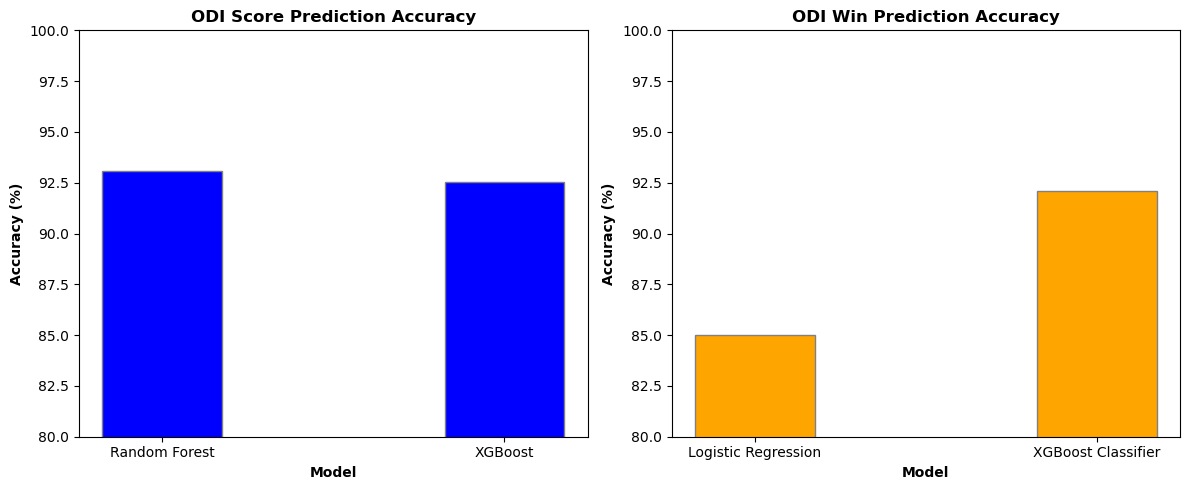

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Data for ODI Score Prediction
score_models = ['Random Forest', 'XGBoost']
score_accuracies = [93.07, 92.56]

# Data for ODI Win Prediction
win_models = ['Logistic Regression', 'XGBoost Classifier']
win_accuracies = [85.00, 92.09]

# Set up the bar width and positions
bar_width = 0.35
r1 = np.arange(len(score_models))
r2 = np.arange(len(win_models))

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plotting ODI Score Prediction Accuracy
ax1.bar(r1, score_accuracies, color='blue', width=bar_width, edgecolor='grey')
ax1.set_xlabel('Model', fontweight='bold')
ax1.set_ylabel('Accuracy (%)', fontweight='bold')
ax1.set_title('ODI Score Prediction Accuracy', fontweight='bold')
ax1.set_xticks(r1)
ax1.set_xticklabels(score_models)
ax1.set_ylim(80, 100)

# Plotting ODI Win Prediction Accuracy
ax2.bar(r2, win_accuracies, color='orange', width=bar_width, edgecolor='grey')
ax2.set_xlabel('Model', fontweight='bold')
ax2.set_ylabel('Accuracy (%)', fontweight='bold')
ax2.set_title('ODI Win Prediction Accuracy', fontweight='bold')
ax2.set_xticks(r2)
ax2.set_xticklabels(win_models)
ax2.set_ylim(80, 100)

# Show the plots
plt.tight_layout()
plt.show()
